## Explorando as variáveis do dataset de casos
 
Verificando medidas de centralidade e dispersão das variáveis
disponíveis

In [19]:
import pandas as pd
import seaborn as sns

O dataset que usaremos tem informações sobre a covid-19 em todos os municípios da Paraíba, atualizado por último no dia 22/08/21.

In [41]:
casos_df = pd.read_csv("datasets/dados_casos.csv")

In [42]:
casos_df.head(5)

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2021-08-22,PB,Água Branca,city,1128,14,True,10306,2500106,10945.08054,0.0124
1,2021-08-22,PB,Aguiar,city,528,5,True,5630,2500205,9378.33037,0.0095
2,2021-08-22,PB,Alagoa Grande,city,4117,72,True,28439,2500304,14476.59904,0.0175
3,2021-08-22,PB,Alagoa Nova,city,1511,25,True,20921,2500403,7222.40811,0.0165
4,2021-08-22,PB,Alagoinha,city,2072,25,True,14560,2500502,14230.76923,0.0121


### Casos confirmados por município

Armazenados na coluna titulada 'confirmed'

In [4]:
casos_df['confirmed'].describe()

count       223.000000
mean       1930.986547
std        7639.848374
min          60.000000
25%         362.500000
50%         655.000000
75%        1295.000000
max      103940.000000
Name: confirmed, dtype: float64

Usando a função describe, calculamos rapidamente algumas medidas de centralidade e dispersão para a quantidade de casos de cada município.

Vemos que a média de casos por município é 1930,98, porém o desvio padrão é 7639,84.

Podemos também observar que a diferença entre o valor mínimo, o primeiro quartil e o segundo quartil são próximas, em torno de 300 casos. A diferença entre o segundo quartil e o terceiro quartil é o dobro disso, quase 600. Já a diferença entre o terceiro quartil e o valor máximo é mais de 10.000 casos. Com isso, podemos especular que o valor máximo representa um outlier, ou que poucos municípios (menos de 25%) concentram a maior quantidade de casos de covid-19 no Estado.

<AxesSubplot:>

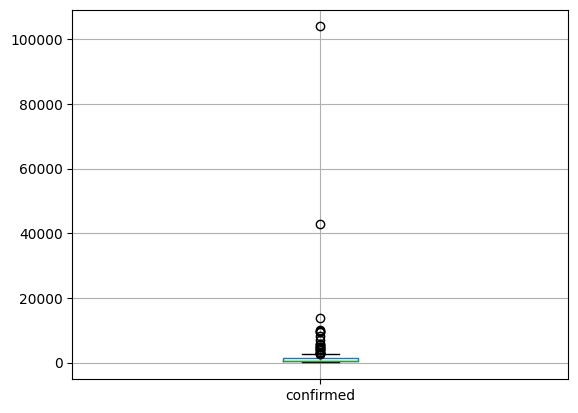

In [8]:
casos_df.boxplot(column = 'confirmed')

In [9]:
casos_df[casos_df['confirmed']>40000]

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
49,2021-08-22,PB,Campina Grande,city,42778,1084,True,411807,2504009,10387.87587,0.0253
93,2021-08-22,PB,João Pessoa,city,103940,2890,True,817511,2507507,12714.20201,0.0278


O boxplot que representa a distribuição dos casos por município é extremamente achatado, de tal forma que se torna ilegível. Isso ocorre pois os dois maiores municípios do Estado, João Pessoa e Campina Grande, concentram muitos mais casos que os demais municípios. Além disso, mesmo não os levando em conta, ainda temos muitos casos outliers além deles. Isso nos mostra que os casos de covid no Estado da Paraíba não estão distribuídos uniformemente entre os municípios, e sim concentrados em focos. 

### Mortes por covid-19 confirmadas por município

Armazenados na coluna titulada 'deaths'

In [10]:
casos_df['deaths'].describe()

count     223.000000
mean       40.973094
std       208.290704
min         0.000000
25%         6.000000
50%        11.000000
75%        25.000000
max      2890.000000
Name: deaths, dtype: float64

Similarmente à quantidade de casos, a média de mortes por municípios tem média baixa, 40,97, porém desvio padrão alto, 208,29. 

Observamos que os valores mínino, e de primeiro, segundo e terceiro quartil são próximos (0, 6, 11 e 25 respectivamente), porém o valor máximo apresenta um salto enorme (2890). Vimos que poucos municípios concentram mais casos e consequentemente devem concentrar mais mortes, mas talvez outro fator para esse fenômeno possa ser o fato que municípios menores têm menos estrutura hospitalar para lidar com casos mais graves da doença, e é comum vermos esses pacientes serem transportados para municípios maiores para melhor tratamento. Dessa forma, caso o paciente venha a óbito, talvez ele seja registrado na capital, por exemplo, ao invés do seu município de origem, inflando mais esses números.

<AxesSubplot:>

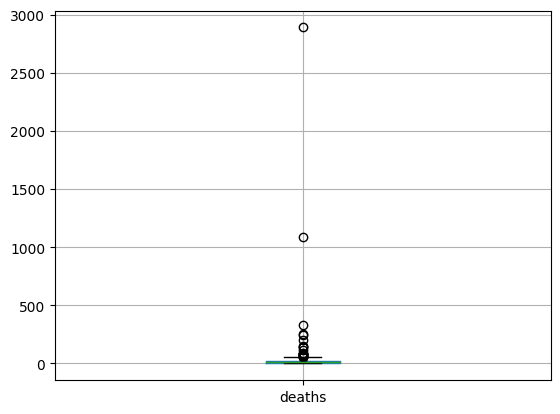

In [11]:
casos_df.boxplot(column = 'deaths')

In [12]:
casos_df[casos_df['deaths']>1000]

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
49,2021-08-22,PB,Campina Grande,city,42778,1084,True,411807,2504009,10387.87587,0.0253
93,2021-08-22,PB,João Pessoa,city,103940,2890,True,817511,2507507,12714.20201,0.0278


Novamente vemos um gráfico boxplot achatado, mostrando que, tal qual os casos de covid-19, as mortes da doença também se concentram em poucos municípios outliers.

### População estimada

Armazenados na coluna titulada 'estimated_population'

In [13]:
casos_df['estimated_population'].describe()

count       223.000000
mean      18113.349776
std       62236.235680
min        1758.000000
25%        4551.500000
50%        7286.000000
75%       15363.000000
max      817511.000000
Name: estimated_population, dtype: float64

Observando as medidas de centralidade dos dados de população dos municípios paraibanos, vemos novamente o comportamento apresentado nas variáveis anteriores: média baixa, desvio padrão alto, valores de primeiro, segundo e terceiro quartil próximos com um salto muito grande entre o último e o valor máximo. Isso nos mostra que grande parte da população do Estado encontra-se concentrada em poucos municípios.

Isso nos mostra que ocorre uma grande concentração de casos e mortes em poucos municípios pois existe essa concentração populacional.

Podemos observar isso melhor no gráfico boxplot da variável.

<AxesSubplot:>

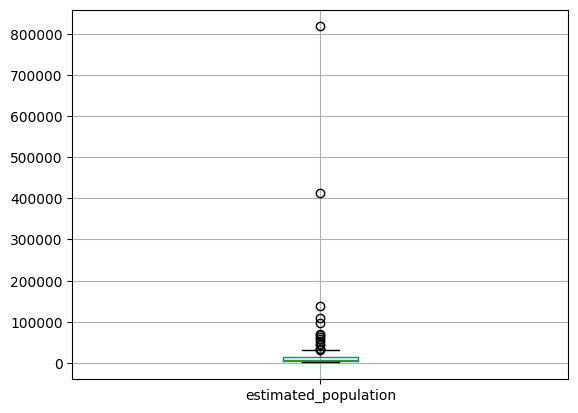

In [23]:
casos_df.boxplot(column = 'estimated_population')

### Casos confirmados por 100 mil habitantes por município

Armazenados na coluna titulada 'confirmed_per_100k_inhabitants'

In [16]:
casos_df['confirmed_per_100k_inhabitants'].describe()

count      223.000000
mean      9242.325208
std       3524.619628
min       1623.815970
25%       6626.868160
50%       8836.278760
75%      11430.389445
max      18192.675160
Name: confirmed_per_100k_inhabitants, dtype: float64

Quando calculamos as medidas de centralidade da quantidade de casos relativas à população de cada município, podemos fazer análises mais pontuais, que não são distorcidas pela diferença populacional. Vemos que esses dados são bem menos dispersos que os dados em quantidades absolutas.

A média de mortes a cada 100 mil habitantes é 9242.32, o desvio padrão é 3524.61, os quartis são 6626.86, 8836.27 e 11430.38. Os valores mínimo e máximo são 1623.81 e 18192.67. 

<AxesSubplot:>

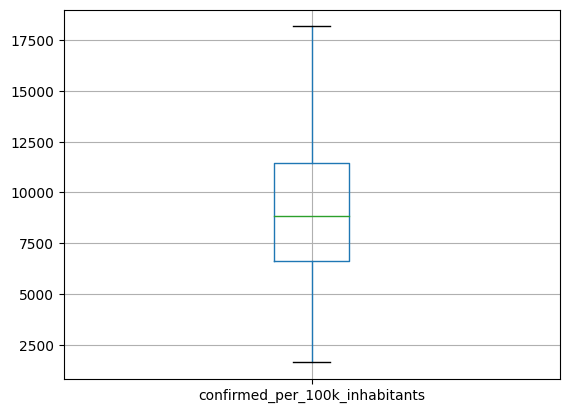

In [15]:
casos_df.boxplot(column = 'confirmed_per_100k_inhabitants')

O boxplot dessa váriavel é muito mais legível do que o das variáveis anteriores.

### Mortalidade da Covid-19 por município

Razão entre a quantidade absoluta de mortes e a quantidade absoluta de casos. Armazenados na coluna titulada 'death_rate'

In [18]:
casos_df['death_rate'].describe()

count    223.000000
mean       0.018596
std        0.009877
min        0.000000
25%        0.012100
50%        0.017200
75%        0.022750
max        0.066700
Name: death_rate, dtype: float64

A mortalidade média é de 0.018, o desvio padrão é 0.0098. Os quartis são 0.012, 0.017 e 0.022. O valor máximo é 0.066. 

Vemos um salto muito grande do terceiro quartil para o valor máximo. Os valores quartis ficam todos próximos à média, porém o valor máximo é 3.6 vezes maior que ela. 

<AxesSubplot:>

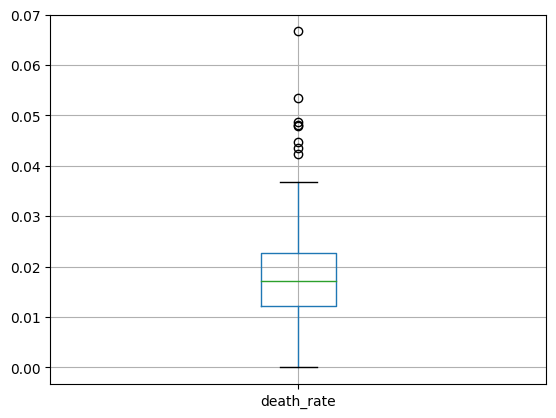

In [30]:
casos_df.boxplot(column='death_rate')

In [37]:
casos_df[casos_df['death_rate']>0.04]['death_rate'].count()

8

Observando o boxplot da mortalidade, vemos que há 8 municípios onde a Covid-19 foi anormalmente mais mortal do que no resto da Paraíba.

## Comparando com o resto do Brasil

Agora, iremos analisar como esses dados da covid-19 na Paraíba se comparam com o resto do Brasil.

Utilizaremos o mesmo modelo de dataset, desta vez que inclui todos os municípios do país, atualizados por último no mesmo dia que o dataset de dados paraibanos.

In [43]:
casos_br_df = pd.read_csv('datasets/dados_br.csv')

In [44]:
casos_br_df.head(5)

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2022-03-26,PI,Acauã,city,228,2,True,7102.0,2200053.0,3210.36328,0.0088
1,2022-03-26,PI,Agricolândia,city,829,10,True,5131.0,2200103.0,16156.69460,0.0121
2,2022-03-26,PI,Água Branca,city,1702,77,True,17470.0,2200202.0,9742.41557,0.0452
3,2022-03-26,PI,Alagoinha do Piauí,city,402,13,True,7665.0,2200251.0,5244.61840,0.0323
4,2022-03-26,PI,Alegrete do Piauí,city,553,9,True,4918.0,2200277.0,11244.40830,0.0163


In [49]:
casos_br_df.describe()

,confirmed,deaths,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
count,5589.000000,5589.000000,5.570000e+03,5.570000e+03,5570.000000,5589.000000
mean,4213.793165,110.104312,3.801718e+04,3.253591e+06,11403.035463,0.022913
std,20947.540060,810.330564,2.228930e+05,9.849103e+05,6275.323937,0.014855
min,0.000000,0.000000,7.760000e+02,1.100015e+06,178.954900,0.000000
25%,518.000000,9.000000,5.442250e+03,2.512126e+06,6962.299600,0.013900
50%,1085.000000,22.000000,1.166550e+04,3.146280e+06,10347.400315,0.020300
75%,2635.000000,54.000000,2.566375e+04,4.119190e+06,14449.463822,0.028500
max,976214.000000,39352.000000,1.232523e+07,5.300108e+06,51915.708810,0.266700


Quanto à média de casos, a brasileira é 4213.79 e a paraibana é 1930.98 (Paraíba bem abaixo da média nacional).
Quanto à média de mortes, a brasileira é 110.10 e a paraibana é 40.97 (Paraíba bem abaixo da média nacional).
Quanto à média de casos a cada 100 mil habitantes, a brasileira é 11403.03 e a paraibana é 9242.32 (Paraíba um tanto abaixo da média nacional).
Quanto à mortalidade média, a brasileira é 0.0229 e a paraibana é 0.0185 (Paraíba um tanto abaixo da média nacional).

In [52]:
sns.set(rc={'figure.figsize':(10,8)})
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

Text(0.5, 0, 'Casos a cada 100 mil habitantes')

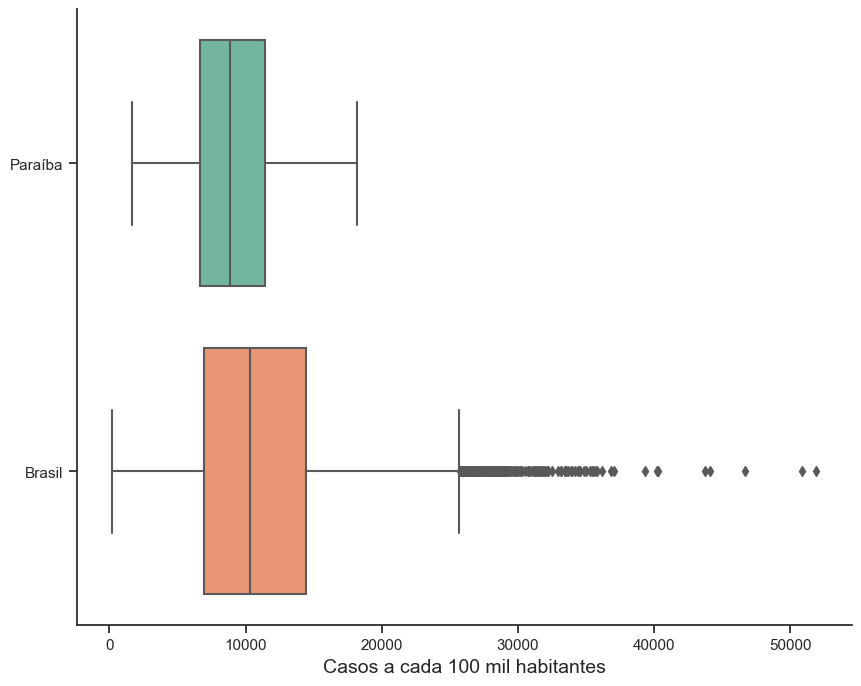

In [54]:
data_cp100k = [casos_df['confirmed_per_100k_inhabitants'], casos_br_df['confirmed_per_100k_inhabitants']]
headers_cp100k = ["Paraíba", "Brasil"]

compare_cp100k = pd.concat(data_cp100k, axis=1, keys=headers_cp100k)

bp_cp100k = sns.boxplot(data = compare_cp100k, orient='h', palette="Set2", order=['Paraíba', 'Brasil'])
bp_cp100k.set_xlabel("Casos a cada 100 mil habitantes", fontsize = 14)

Vemos que, quanto aos casos a cada 100 mil habitantes, a Paraíba ficou bem, comparada ao cenário nacional. Os valores de primeiro quartil são aproximadamente iguais e os de mediana são muito próximos. O terceiro quartil do boxplot paraibano já fica um pouco mais atrás do nacional, e não há presença de outliers, ao contrário do outro.

Text(0.5, 0, 'Mortalidade')

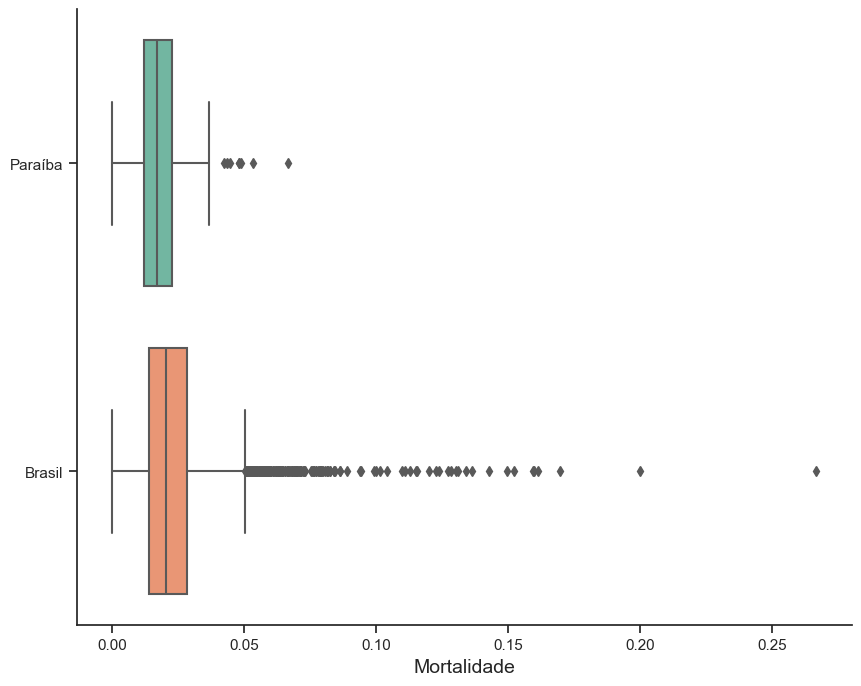

In [55]:
data_dr = [casos_df['death_rate'], casos_br_df['death_rate']]
headers_dr = ["Paraíba", "Brasil"]

compare_dr = pd.concat(data_dr, axis=1, keys=headers_dr)

bp_dr = sns.boxplot(data = compare_dr, orient='h', palette="Set2", order=['Paraíba', 'Brasil'])
bp_dr.set_xlabel("Mortalidade", fontsize = 14)

Já para o boxplot da variável mortalidade, o gráfico paraibano se assemelha bem mais ao brasileiro. Nele, podemos observar a presença de municípios paraibanos que são outliers não só a nível estadual, mas também a nível nacional.

Como temos valores outliers para a mortalidade, mas não para a quantidade de casos a cada 100 mil habitantes, podemos concluir que existem na Paraíba municípios onde a mortalidade pela Covid-19 foi desproporcional à quantidade de casos. Ou seja, morreram mais pessoas do que deveriam.